In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
import numpy as np



from person import Person

In [66]:
data =pd.read_csv("output_data.csv")

data = data.drop(columns=["Unnamed: 0"])

data.head()




,Emp_Id,Age,Attrition,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,51,0,6,2,1,131160,1.0,11,0,...,0,0,0,0,0,0,0,0,1,0
1,2,31,1,10,1,1,41890,0.0,23,1,...,0,0,0,0,1,0,0,0,0,1
2,3,32,0,17,4,4,193280,1.0,15,3,...,0,0,0,0,0,1,0,0,1,0
3,4,38,0,2,5,3,83210,3.0,11,3,...,0,0,0,0,0,0,0,0,1,0
4,5,32,0,10,1,1,23420,4.0,12,2,...,0,0,0,0,0,1,0,0,0,1


In [78]:
copied_data = data.copy()
copied_data_for_analysis= data.copy()

In [68]:
data.columns

Index(['Emp_Id', 'Age', 'Attrition', 'DistanceFromHome', 'Education',
       'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'Q1_Longest_Streak_OUT',
       'Q2_Longest_Streak_OUT', 'Q3_Longest_Streak_OUT',
       'Q4_Longest_Streak_OUT', 'Q1_Longest_Streak_IN', 'Q2_Longest_Streak_IN',
       'Q3_Longest_Streak_IN', 'Q4_Longest_Streak_IN',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other

In [69]:
persons = []

# Iterate over each row in the DataFrame
for index, row in data.iterrows():
    # Create a new Person object with the data from the row
    person = Person(
        emp_id=row['Emp_Id'],
        age=row['Age'],
        attrition=row['Attrition'],
        distance_from_home=row['DistanceFromHome'],
        education=row['Education'],
        job_level=row['JobLevel'],
        monthly_income=row['MonthlyIncome'],
        num_companies_worked=row['NumCompaniesWorked'],
        percent_salary_hike=row['PercentSalaryHike'],
        stock_option_level=row['StockOptionLevel'],
        total_working_years=row['TotalWorkingYears'],
        training_times_last_year=row['TrainingTimesLastYear'],
        years_at_company=row['YearsAtCompany'],
        years_since_last_promotion=row['YearsSinceLastPromotion'],
        years_with_curr_manager=row['YearsWithCurrManager'],
        environment_satisfaction=row['EnvironmentSatisfaction'],
        job_satisfaction=row['JobSatisfaction'],
        work_life_balance=row['WorkLifeBalance'],
        job_involvement=row['JobInvolvement'],
        performance_rating=row['PerformanceRating'],
        q1_longest_streak_out=row['Q1_Longest_Streak_OUT'],
        q2_longest_streak_out=row['Q2_Longest_Streak_OUT'],
        q3_longest_streak_out=row['Q3_Longest_Streak_OUT'],
        q4_longest_streak_out=row['Q4_Longest_Streak_OUT'],
        q1_longest_streak_in=row['Q1_Longest_Streak_IN'],
        q2_longest_streak_in=row['Q2_Longest_Streak_IN'],
        q3_longest_streak_in=row['Q3_Longest_Streak_IN'],
        q4_longest_streak_in=row['Q4_Longest_Streak_IN'],
        business_travel_non_travel=row['BusinessTravel_Non-Travel'],
        business_travel_travel_frequently=row['BusinessTravel_Travel_Frequently'],
        business_travel_travel_rarely=row['BusinessTravel_Travel_Rarely'],
        department_human_resources=row['Department_Human Resources'],
        department_research_development=row['Department_Research & Development'],
        department_sales=row['Department_Sales'],
        education_field_human_resources=row['EducationField_Human Resources'],
        education_field_life_sciences=row['EducationField_Life Sciences'],
        education_field_marketing=row['EducationField_Marketing'],
        education_field_medical=row['EducationField_Medical'],
        education_field_other=row['EducationField_Other'],
        education_field_technical_degree=row['EducationField_Technical Degree'],
        gender_female=row['Gender_Female'],
        gender_male=row['Gender_Male'],
        job_role_healthcare_representative=row['JobRole_Healthcare Representative'],
        job_role_human_resources=row['JobRole_Human Resources'],
        job_role_laboratory_technician=row['JobRole_Laboratory Technician'],
        job_role_manager=row['JobRole_Manager'],
        job_role_manufacturing_director=row['JobRole_Manufacturing Director'],
        job_role_research_director=row['JobRole_Research Director'],
        job_role_research_scientist=row['JobRole_Research Scientist'],
        job_role_sales_executive=row['JobRole_Sales Executive'],
        job_role_sales_representative=row['JobRole_Sales Representative'],
        marital_status_divorced=row['MaritalStatus_Divorced'],
        marital_status_married=row['MaritalStatus_Married'],
        marital_status_single=row['MaritalStatus_Single']
    )
    # Add the new Person object to the list
    persons.append(person)


In [70]:
average_values = data[data['Attrition'] == 1].mean()

In [71]:
print(average_values)

Emp_Id                                2206.749640
Age                                     33.686331
Attrition                                1.000000
DistanceFromHome                         9.044604
Education                                2.877698
JobLevel                                 2.030216
MonthlyIncome                        61564.215827
NumCompaniesWorked                       2.939568
PercentSalaryHike                       15.497842
StockOptionLevel                         0.779856
TotalWorkingYears                        8.293525
TrainingTimesLastYear                    2.660432
YearsAtCompany                           5.155396
YearsSinceLastPromotion                  1.969784
YearsWithCurrManager                     2.870504
EnvironmentSatisfaction                  2.466187
JobSatisfaction                          2.466187
WorkLifeBalance                          2.664748
JobInvolvement                           2.705036
PerformanceRating                        3.175540


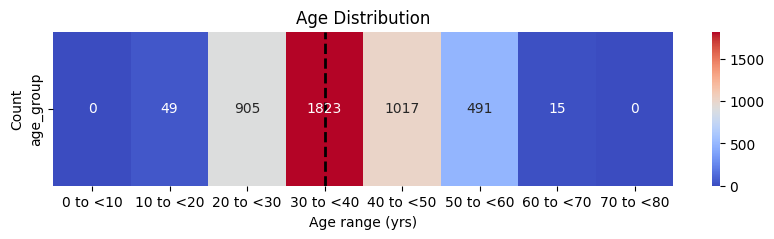

In [72]:


# Creating age bins
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
labels = ['0 to <10', '10 to <20', '20 to <30', '30 to <40', '40 to <50', '50 to <60', '60 to <70', '70 to <80']
copied_data_for_analysis['age_group'] = pd.cut(copied_data_for_analysis['Age'], bins=age_bins, labels=labels, right=False)

# Creating a frequency table
age_distribution = copied_data_for_analysis['age_group'].value_counts().reindex(labels).fillna(0)
heatmap_data = pd.DataFrame(age_distribution).T

# Plotting the heatmap
plt.figure(figsize=(10, 2))
ax = sns.heatmap(heatmap_data, annot=True, fmt="g", cmap="coolwarm")
plt.title('Age Distribution')
plt.ylabel('Count')
plt.xlabel('Age range (yrs)')

# Adding a vertical dashed line at x=33.7
# Determine the bin where 33.7 falls
bin_position = age_bins.index(next(b for b in age_bins if b > 33.7)) - 0.5
plt.axvline(x=bin_position, color='black', linestyle='--', linewidth=2)

# Show the plot with the vertical line
plt.show()


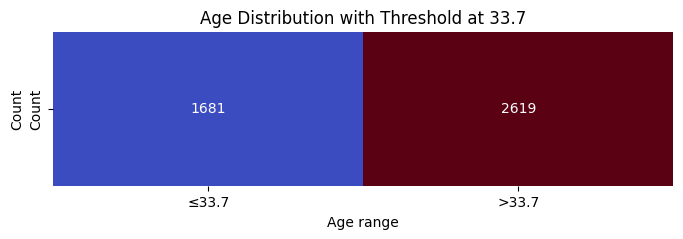

In [73]:
copied_data_for_analysis['age_bin'] = ['≤33.7' if x <= 33.7 else '>33.7' for x in data['Age']]

# Calculate counts for each bin
age_bin_counts = copied_data_for_analysis['age_bin'].value_counts().reindex(['≤33.7', '>33.7'])

# Prepare the data for the heatmap
heatmap_data = pd.DataFrame([age_bin_counts])
heatmap_data.index = ['Count']

# We'll create a custom colormap where the second bin is less bright
current_cmap = plt.cm.coolwarm
colors = current_cmap(np.arange(current_cmap.N))
colors[int(len(colors)/2):, :-1] *= 0.5  # Reduce the brightness of the upper half of the colormap
custom_cmap = ListedColormap(colors)

# Plotting the heatmap
plt.figure(figsize=(8, 2))
ax = sns.heatmap(heatmap_data, annot=True, fmt="g", cmap=custom_cmap, cbar=False)
plt.title('Age Distribution with Threshold at 33.7')
plt.ylabel('Count')
plt.xlabel('Age range')

# Adding a vertical dashed line at x=33.7
# We only have two bins, so the line will be between these two

# Show the plot with the vertical line
plt.show()

In [74]:
data.columns

Index(['Emp_Id', 'Age', 'Attrition', 'DistanceFromHome', 'Education',
       'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'Q1_Longest_Streak_OUT',
       'Q2_Longest_Streak_OUT', 'Q3_Longest_Streak_OUT',
       'Q4_Longest_Streak_OUT', 'Q1_Longest_Streak_IN', 'Q2_Longest_Streak_IN',
       'Q3_Longest_Streak_IN', 'Q4_Longest_Streak_IN',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other

/var/folders/1k/fcq_03s56gxg949blczq5qwr0000gn/T/ipykernel_993/3210979263.py:23: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



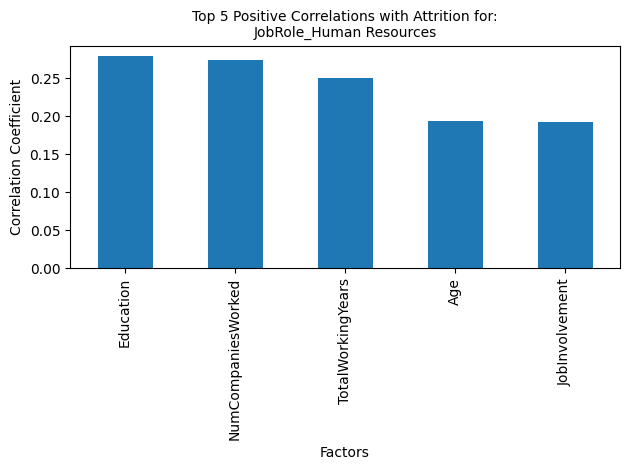

In [75]:
import pandas as pd
import tkinter as tk
from tkinter import ttk
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

def set_style():
    style = ttk.Style()
    style.theme_use('clam')  # Use a theme for better looking widgets

    # Customize specific widget styles
    style.configure('TButton', font=('Helvetica', 12), borderwidth='4')
    style.configure('TLabel', font=('Helvetica', 12), background='light gray')
    style.configure('TCombobox', font=('Helvetica', 12))

# Function to perform analysis and plot
# Function to perform analysis and plot
def analyze_data(job_role):
    # Filter data for the selected job role
    filtered_data = data[data[job_role] == 1]

    # Calculate correlation with Attrition and sort in descending order
    correlation = filtered_data.corr()['Attrition'].sort_values(ascending=False)

    # Select top 5 positive correlations (excluding 'Attrition' itself)
    top_correlations = correlation.drop('Attrition').head(5)

    # Display results in text
    result_label.config(text=top_correlations)

    # Plotting the bar plot
    fig, ax = plt.subplots()
    top_correlations.plot(kind='bar', ax=ax)
    
    # Format the title to occupy multiple lines
    title_text = "Top 5 Positive Correlations with Attrition for:\n{}".format(job_role)
    ax.set_title(title_text, fontsize=10)
    ax.set_ylabel("Correlation Coefficient")
    ax.set_xlabel("Factors")
    plt.tight_layout()  # Adjust the layout

    # Embedding plot in Tkinter
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas_widget = canvas.get_tk_widget()
    canvas_widget.pack()
    canvas.draw()


# GUI setup
root = tk.Tk()
root.title("Attrition Analysis")


# Dropdown menu for job roles
job_roles = [col for col in data.columns if 'JobRole_' in col]
job_role_var = tk.StringVar()
job_role_dropdown = ttk.Combobox(root, textvariable=job_role_var, values=job_roles)
job_role_dropdown.pack()

# Button to perform analysis
analyze_button = tk.Button(root, text="Analyze", command=lambda: analyze_data(job_role_var.get()))
analyze_button.pack()

# Label to display results
result_label = tk.Label(root, text="", wraplength=400)
result_label.pack()

root.mainloop()


In [76]:
copied_data = data.copy()

In [77]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.feature_selection import RFE
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE





# Splitting the data into training and testing sets
X = copied_data.drop('Attrition', axis=1)
y = copied_data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Resampling with SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Creating a pipeline with scaling, feature selection, and logistic regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('feature_selection', RFE(estimator=LogisticRegression(), n_features_to_select=10)),
    ('classifier', LogisticRegression())
])

# Hyperparameter tuning
parameters = {
    'classifier__C': [0.01, 0.1, 1, 10, 100],
    'classifier__penalty': ['l2']
}

grid_search = GridSearchCV(pipeline, parameters, cv=5, scoring='roc_auc')
grid_search.fit(X_train_res, y_train_res)

# Best model
best_model = grid_search.best_estimator_

# Predictions
predictions = best_model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("ROC AUC Score:", roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1]))





ValueError: could not convert string to float: '40 to <50'

In [ ]:
copied_data.columns

Index(['Emp_Id', 'Age', 'Attrition', 'DistanceFromHome', 'Education',
       'JobLevel', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'Q1_Longest_Streak_OUT',
       'Q2_Longest_Streak_OUT', 'Q3_Longest_Streak_OUT',
       'Q4_Longest_Streak_OUT', 'Q1_Longest_Streak_IN', 'Q2_Longest_Streak_IN',
       'Q3_Longest_Streak_IN', 'Q4_Longest_Streak_IN',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other

In [ ]:
print(X.columns)


Index(['Emp_Id', 'Age', 'DistanceFromHome', 'Education', 'JobLevel',
       'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance',
       'JobInvolvement', 'PerformanceRating', 'Q1_Longest_Streak_OUT',
       'Q2_Longest_Streak_OUT', 'Q3_Longest_Streak_OUT',
       'Q4_Longest_Streak_OUT', 'Q1_Longest_Streak_IN', 'Q2_Longest_Streak_IN',
       'Q3_Longest_Streak_IN', 'Q4_Longest_Streak_IN',
       'BusinessTravel_Non-Travel', 'BusinessTravel_Travel_Frequently',
       'BusinessTravel_Travel_Rarely', 'Department_Human Resources',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Human Resources', 'EducationField_Life Sciences',
       'EducationField_Marketing', 'EducationField_Medical',
       'EducationField_Other', 'Education

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
import shap



# Splitting the data into training and testing sets
X = copied_data.drop('Attrition', axis=1)
y = copied_data['Attrition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Reset the index of X_test to avoid indexing issues
X_test = X_test.reset_index(drop=True)


# Resampling with SMOTE
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

# Train a logistic regression model on the full set of features
lr_model_full = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence issues
lr_model_full.fit(X_train_res, y_train_res)


# Create a SHAP explainer using the full model
explainer_full = shap.Explainer(lr_model_full, X_train_res)

# Calculate SHAP values for the test set
shap_values_full = explainer_full(X_test)

# Initialize a DataFrame to store predictions and SHAP values
predictions_df = pd.DataFrame(columns=['Emp_Id', 'Attrition_Probability', 'Top_SHAP_Features'])
predictions_features_df = pd.DataFrame()

# Iterate over each row in the test set
for index, row in X_test.iterrows():
    # Create a DataFrame for the row with the correct column names
    # This is crucial to match the training data format
    row_df = pd.DataFrame([row], columns=X_train.columns)

    # Predict the probability for this individual using the row DataFrame
    probability = lr_model_full.predict_proba(row_df)[0, 1]

    # Get the employee ID
    emp_id = copied_data[copied_data.index == index]['Emp_Id'].iloc[0]

    # Get SHAP values for the current instance
    instance_shap_values = shap_values_full[index].values

    # Sort features by their SHAP value's absolute magnitude in descending order
    top_features_indices = np.argsort(np.abs(instance_shap_values))[::-1][:5]
    top_features = [(X_train.columns[i], instance_shap_values[i]) for i in top_features_indices]

    # Get the employee ID
    emp_id = copied_data[copied_data['Emp_Id'] == emp_id]['Emp_Id'].iloc[0]

    # Get the actual values of the top features from the non-normalized data (copied_data)
    actual_feature_values = copied_data.loc[copied_data['Emp_Id'] == emp_id, [feat for feat, _ in top_features]].iloc[0]

    # Combine the SHAP values and actual values into a formatted string
    combined_features = '\n'.join([
        f"{feat}: Value: {actual_val} Effect on Attrition (%): {shap_val:.2%}" 
        for (feat, shap_val), actual_val in zip(top_features, actual_feature_values)
    ])

    # Create a new row for the DataFrame
    new_row = {
        'Emp_Id': emp_id,
        'Attrition_Probability': probability,
        'Combined_Features': combined_features
    }

    # Append the new row to the DataFrame
    predictions_features_df = predictions_features_df.append(new_row, ignore_index=True)

predictions_features_df['Attrition_Probability'] = predictions_features_df['Attrition_Probability'].apply(lambda x: f"{x:.2%}")

# Set 'Emp_Id' as the index of the DataFrame
predictions_features_df.set_index('Emp_Id', inplace=True)

# Display the predictions with combined feature effects and actual values
print(predictions_features_df)

/var/folders/1k/fcq_03s56gxg949blczq5qwr0000gn/T/ipykernel_993/2639440339.py:79: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/1k/fcq_03s56gxg949blczq5qwr0000gn/T/ipykernel_993/2639440339.py:79: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/1k/fcq_03s56gxg949blczq5qwr0000gn/T/ipykernel_993/2639440339.py:79: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/1k/fcq_03s56gxg949blczq5qwr0000gn/T/ipykernel_993/2639440339.py:79: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/1k/fcq_03s56gxg949blczq5qwr0000gn/T/ipykernel_993/2639440339.py:79: FutureWarning:

The frame.append method is deprecated a

       Attrition_Probability  \
Emp_Id                         
1                     53.36%   
2                     50.40%   
3                     37.33%   
4                     43.21%   
5                     47.84%   
...                      ...   
885                   27.40%   
886                   59.73%   
887                   48.13%   
888                   49.39%   
889                   50.30%   

                                        Combined_Features  
Emp_Id                                                     
1       TotalWorkingYears: Value: 1.0 Effect on Attrit...  
2       TotalWorkingYears: Value: 6.0 Effect on Attrit...  
3       YearsAtCompany: Value: 5.0 Effect on Attrition...  
4       TotalWorkingYears: Value: 13.0 Effect on Attri...  
5       YearsAtCompany: Value: 6.0 Effect on Attrition...  
...                                                   ...  
885     TotalWorkingYears: Value: 10.0 Effect on Attri...  
886     TotalWorkingYears: Value: 10.0 Effe

/var/folders/1k/fcq_03s56gxg949blczq5qwr0000gn/T/ipykernel_993/2639440339.py:79: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/1k/fcq_03s56gxg949blczq5qwr0000gn/T/ipykernel_993/2639440339.py:79: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/1k/fcq_03s56gxg949blczq5qwr0000gn/T/ipykernel_993/2639440339.py:79: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/1k/fcq_03s56gxg949blczq5qwr0000gn/T/ipykernel_993/2639440339.py:79: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/1k/fcq_03s56gxg949blczq5qwr0000gn/T/ipykernel_993/2639440339.py:79: FutureWarning:

The frame.append method is deprecated a

In [ ]:
import dtale

# Convert 'Attrition_Probability' from percentage strings to floats
predictions_features_df['Attrition_Probability'] = predictions_features_df['Attrition_Probability'].str.rstrip('%').astype('float') / 100.0

# Sort the DataFrame by 'Attrition_Probability'
sorted_predictions_df = predictions_features_df.sort_values('Attrition_Probability', ascending=False)

# Convert 'Attrition_Probability' back to percentage strings if you want to display it as such
sorted_predictions_df['Attrition_Probability'] = sorted_predictions_df['Attrition_Probability'].apply(lambda x: f"{x:.2%}")

# Print the sorted DataFrame


# Assuming 'predictions_df' is your DataFrame
d = dtale.show(sorted_predictions_df)
d.open_browser()


In [ ]:
pathh="attrition.xlsx"
sorted_predictions_df.to_excel(pathh)

In [ ]:
data.shape

(4300, 54)